![Hurricane Maria](Images/Hurricane_Maria_Satellite.jpg)

# HurriPy Maria

In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt # Plotting library
import pandas as pd
import numpy as np
import requests
import datetime
import sys
# Import API key
from api_keys import noaa_key
print("All necessary libraries installed")

All necessary libraries installed


# Hurricane Maria

### Hurricane Maria was a deadly Category 5 hurricane that devastated Dominica, St Croix, and Puerto Rico in September 2017
**_Worst natural disaster in recorded history to affect those islands and was also the deadliest Atlantic hurricane since Jeanne in 2004. The tenth-most intense Atlantic hurricane on record and the most intense tropical cyclone worldwide in 2017.The hurricane reached Category 5 strength on September 18 just before making landfall on Dominica, becoming the first Category 5 hurricane on record to strike the island.On September 20, an eyewall replacement cycle took place, weakening Maria to a high-end Category 4 hurricane by the time it struck Puerto Rico.On August 28, 2018 (almost a year after the hurricane), Puerto Rico revised its official tally of 64 killed in the hurricane up to 2,975, making the total death toll 3,059._**

## Location id:  Puerto Rico ("FIPS:43")

### Dataset id: "GHCND" (name: "Daily Summaries")

![Maria landfall](Images/Hurricane_Maria_landfall.jpg)

## Let's see all the stations that returned "GHCND" data in Puerto Rico 

In [2]:
import json
# Let's get fetch all the stations near Yabucoa, Puerto Rico
mytoken = noaa_key
location_id = "FIPS:43"
dataset_id = "GHCND"
zipcodes = ["ZIP:00653","ZIP:00602","ZIP:00705","ZIP:00612","ZIP:00685","ZIP:00637","ZIP:00716","ZIP:00765","ZIP:00976","ZIP:00641","ZIP:00606","ZIP:00623","ZIP:00949","ZIP:00907","ZIP:00924"]
# Define base url to get weather summaries
base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?"
# Let's create a list to hold the responses from API call
station_id = []
station_name = []
latitude = []
longitude = []
for zipcode in zipcodes:
    # Create a query_url
    query_url = base_url+"datasetid=GHCND"+"&"+"locationid="+str(zipcode)+"&"+"limit=50"
    # Create the request query
    response = requests.get(query_url, headers = {"token":mytoken})
    # Print the response url 
    print('\033[1m'+"Zipcode :{}".format(zipcode)+'\033[0m')
    print("Request status code: "+str(response.status_code))
    response_json = response.json()
    # Let's fill the dictionaries from the response file
    for i in range(len(response_json["results"])):
        try:
            station_id.append(response_json["results"][i]["id"])
            station_name.append(response_json["results"][i]["name"])
            latitude.append(response_json["results"][i]["latitude"])
            longitude.append(response_json["results"][i]["longitude"])
            # Handle exceptions for data not found in the response file
        except(KeyError, ValueError):
            # Print error message
            print("Index {} : Data Not found ! Skipping..".format(i))
            pass

Zipcode :ZIP:00653
Request status code: 200
Zipcode :ZIP:00602
Request status code: 200
Zipcode :ZIP:00705
Request status code: 200
Zipcode :ZIP:00612
Request status code: 200
Zipcode :ZIP:00685
Request status code: 200
Zipcode :ZIP:00637
Request status code: 200
Zipcode :ZIP:00716
Request status code: 200
Zipcode :ZIP:00765
Request status code: 200
Zipcode :ZIP:00976
Request status code: 200
Zipcode :ZIP:00641
Request status code: 200
Zipcode :ZIP:00606
Request status code: 200
Zipcode :ZIP:00623
Request status code: 200
Zipcode :ZIP:00949
Request status code: 200
Zipcode :ZIP:00907
Request status code: 200
Zipcode :ZIP:00924
Request status code: 200


## Creating a dataframe from the response

In [3]:
# Let's create a DataFrame with the lists
df_PrtoRcoStations = pd.DataFrame({
    "Station id": station_id,
    "Station name": station_name,
    "Latitude": latitude,
    "Longitude": longitude
})
print('\033[1m'+"The shape of the {} dataframe is: {}" .format("df_PrtoRcoStations",df_PrtoRcoStations.shape)+'\033[0m')
df_PrtoRcoStations.head() # Display the DataFrame

The shape of the df_PrtoRcoStations dataframe is: (46, 4)


,Station id,Station name,Latitude,Longitude
0,GHCND:RQC00663532,"ENSENADA 1 W, US",17.9727,-66.94580
1,GHCND:RQC00664211,"GUAYANILLA, US",18.0000,-66.86667
2,GHCND:RQC00668955,"SANTA RITA, US",18.0097,-66.88470
3,GHCND:RQC00662801,"COLOSO, US",18.3808,-67.15690
4,GHCND:RQC00660158,"AIBONITO 1 S, US",18.1280,-66.26410


In [4]:
# Let's create a list of stations 
PrtoRcoStations = pd.Series(df_PrtoRcoStations["Station id"])

## Let's collect data from the selected stations close to the dates Maria hit Puerto Rico 

### Collect response from the selected zipcodes 

In [5]:
import json
# Let's get fetch data from all the selected stations in Puerto Rico
mytoken = noaa_key
location_id = "FIPS:43"
dataset_id = "GHCND"
zipcodes = ["ZIP:00653","ZIP:00602","ZIP:00705","ZIP:00612","ZIP:00685","ZIP:00637","ZIP:00716","ZIP:00765","ZIP:00976","ZIP:00641","ZIP:00606","ZIP:00623","ZIP:00949","ZIP:00907","ZIP:00924"]
start_date = "2017-09-15"
end_date = "2017-09-26"
# Define base url to get weather summaries
base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?"
# Let's create a list of dictionaries
weather_data = []
# Display the start of Data Retrieval
#print(f"****** Beginning Data Retrieval *********")
# Let's fill the dictionaries from the response file
for zipcode in zipcodes:
    # Create a query_url
    query_url = base_url+"datasetid="+str(dataset_id)+"&"+"locationid="+str(zipcode)+"&"+"startdate="+str(start_date)+"&"+"enddate="+str(end_date)+"&"+"limit=50"+"&"+"units=standard"
    # Create the request query
    response = requests.get(query_url, headers = {"token":mytoken})
    # Print the response url 
    print('\033[1m'+"Zipcode :{}".format(zipcode)+'\033[0m')
    print("Request status code: "+str(response.status_code))
    response_json = response.json()
    if len(response_json["results"]) != 0:
        for i in range(len(response_json["results"])):
            try:
                datatype = response_json["results"][i]["datatype"]
                date = response_json["results"][i]["date"]
                station = response_json["results"][i]["station"]
                value = response_json["results"][i]["value"]
                weather_data.append({"DataType":datatype,
                                    "Date":date,
                                    "Station id":station,
                                    "Value":value})
            # Handle exceptions for data not found in the response file
            except(KeyError, ValueError):
            # Print error message
                print("Index {} : Data Not found ! Skipping..".format(i))
            pass
    else:
        continue
        
#print(f"****** Data Retrieval Complete **********")

Zipcode :ZIP:00653
Request status code: 200
Zipcode :ZIP:00602
Request status code: 200
Zipcode :ZIP:00705
Request status code: 200
Zipcode :ZIP:00612
Request status code: 200
Zipcode :ZIP:00685
Request status code: 200
Zipcode :ZIP:00637
Request status code: 200
Zipcode :ZIP:00716
Request status code: 200
Zipcode :ZIP:00765
Request status code: 200
Zipcode :ZIP:00976
Request status code: 200
Zipcode :ZIP:00641
Request status code: 200
Zipcode :ZIP:00606
Request status code: 200
Zipcode :ZIP:00623
Request status code: 200
Zipcode :ZIP:00949
Request status code: 200
Zipcode :ZIP:00907
Request status code: 200
Zipcode :ZIP:00924
Request status code: 200


### Creating a dataframe from the response

In [6]:
# Let's create a DataFrame with the lists
df_weather = pd.DataFrame(weather_data)
print('\033[1m'+"The shape of the {} dataframe is: {}" .format("df_weather",df_weather.shape)+'\033[0m')
df_weather.head() # Display the DataFrame

The shape of the df_weather dataframe is: (211, 4)


,DataType,Date,Station id,Value
0,PRCP,2017-09-15T00:00:00,GHCND:RQC00663532,0.3
1,PRCP,2017-09-16T00:00:00,GHCND:RQC00663532,0.0
2,PRCP,2017-09-17T00:00:00,GHCND:RQC00663532,0.0
3,PRCP,2017-09-18T00:00:00,GHCND:RQC00663532,0.0
4,PRCP,2017-09-19T00:00:00,GHCND:RQC00663532,0.0


In [7]:
# Let's create a list of stations 
LWeatherStations = pd.Series(df_weather["Station id"])

![Hurricane Irma](Images/Hurricane-IrmaA.jpg)

### Any common stations between the  two lists ?

In [8]:
def common_member (x,y):
    x_set = set(x)
    y_set = set(y)
    if len(x_set.intersection(y_set))>0:
        return(True)
    return(False)
print('\033[1m'+"Are there common stations between lists? {}" .format(common_member(LWeatherStations,PrtoRcoStations))+'\033[0m')

Are there common stations between lists? True


In [9]:
x_set = set(LWeatherStations)
y_set = set(PrtoRcoStations)
print('\033[1m'+"Number of stations without geo-cordinates: {}" .format(len(x_set-y_set))+'\033[0m')
print('\033[1m'+"Stations without geo-cordinates: {}" .format((x_set-y_set))+'\033[0m')

Number of stations without geo-cordinates: 0
Stations without geo-cordinates: set()


## Creating a combined dataframe with geo coordinates

In [10]:
# Combine the dataframes into a single dataframe
df_PrtRcoWeather = pd.merge(df_weather, df_PrtoRcoStations, how="inner", on="Station id")
# Using list comprehensions to remove the time stamp from Date
df_PrtRcoWeather["Date"] = [v[:-9] for v in df_PrtRcoWeather["Date"]]
# Display the Dataframe
print('\033[96m'+'\033[1m'+"The shape of the {} dataframe is {}:" .format("df_PrtRcoWeatherr",df_PrtRcoWeather.shape)+'\033[0m')
df_PrtRcoWeather.head()

The shape of the df_PrtRcoWeatherr dataframe is (211, 7):


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,PRCP,2017-09-15,GHCND:RQC00663532,0.3,"ENSENADA 1 W, US",17.9727,-66.9458
1,PRCP,2017-09-16,GHCND:RQC00663532,0.0,"ENSENADA 1 W, US",17.9727,-66.9458
2,PRCP,2017-09-17,GHCND:RQC00663532,0.0,"ENSENADA 1 W, US",17.9727,-66.9458
3,PRCP,2017-09-18,GHCND:RQC00663532,0.0,"ENSENADA 1 W, US",17.9727,-66.9458
4,PRCP,2017-09-19,GHCND:RQC00663532,0.0,"ENSENADA 1 W, US",17.9727,-66.9458


In [11]:
# Let's see the unique datatypes in the final DataFrame
print(df_PrtRcoWeather["DataType"].unique().tolist())

['PRCP', 'TMAX', 'TMIN', 'TOBS', 'DAPR', 'MDPR', 'SNOW']


## Definition of the data types :
* PRCP  : Precipitation (mm or inches)
* DAPR  : Number of days included in multiday precipitation total (MDPR)
* SNOW  : Snowfall (mm or inches)
* MDPR  : Multiday precipitation total (mm or inches)
* TMAX  : Maximim Temperature (Fahrenheit or Celsius)
* TMIN  : Minimum Temperature (Fahrenheit or Celsius)
* TOBS  : Temperature at the time of observation (Fahrenheit or Celsius)

## Let's see how many data points are available for each weather types

In [12]:
# Let's groupby data-type column in the dataframe and count the ocurrences
grouped_count = df_PrtRcoWeather["DataType"].groupby(df_PrtRcoWeather["DataType"]) # Create a GroupBy object
# Let's create a dataframe with the number of data points for each weather data type
weather_count_unsorted = grouped_count.count().to_frame("Count")
# Let's sort the dataframe by number of count
weather_count = weather_count_unsorted.sort_values(by="Count",ascending=False)
# Let's reset index in the new dataframe
weather_count.reset_index(inplace=True)
# Display the Dataframe
print('\033[96m'+'\033[1m'+"The shape of weather count dataframe is {}:" .format(weather_count.shape)+'\033[0m')
weather_count.head()

The shape of weather count dataframe is (7, 2):


,DataType,Count
0,PRCP,114
1,TMAX,28
2,TMIN,28
3,TOBS,26
4,SNOW,6


## Precipitation in Peurto Rico when hurricane Maria made landfall

In [13]:
# Let's create a precipitation dataframe
df_prcp_unsorted = df_PrtRcoWeather.loc[(df_PrtRcoWeather["DataType"]=="PRCP"),:]
# Let's sort the dataframe by Date
df_prcp = df_prcp_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_prcp.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_prcp.to_csv("Output_Data/Maria_Prcp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the precipitation dataframe is:{}".format(df_prcp.shape)+'\033[0m')
df_prcp.head()

The shape of the precipitation dataframe is:(114, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,PRCP,2017-09-15,GHCND:RQC00663532,0.30,"ENSENADA 1 W, US",17.972700,-66.945800
1,PRCP,2017-09-15,GHCND:RQC00665908,0.00,"MARICAO 2 SSW, US",18.151100,-66.988800
2,PRCP,2017-09-15,GHCND:RQ1PRUT0002,0.00,"UTUADO 5.5 W, US",18.268389,-66.789861
3,PRCP,2017-09-15,GHCND:RQ1PRPC0006,1.35,"PONCE 2.3 NE, US",18.012470,-66.587400
4,PRCP,2017-09-15,GHCND:RQ1PRPC0002,0.00,"PONCE 3.2 NNE, US",18.031824,-66.599561


## Let's create maximum precipitation dataframe

In [14]:
# Let's groupby value column by date and count the maximum ocurrences
grouped_count = df_prcp["Value"].groupby(df_prcp["Date"]) # Create a GroupBy object
# Let's create a dataframe with maximum precipitation per day
df_prcp_max_unsorted = grouped_count.max().to_frame("Value")
# Let's sort the dataframe by date
df_prcp_max = df_prcp_max_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_prcp_max.reset_index(inplace=True)
# Save the dataframe to the output file
df_prcp_max.to_csv("Output_Data/Maria_Prcp_max.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the max per day precipitation dataframe is:{}".format(df_prcp_max.shape)+'\033[0m')
df_prcp_max.head()

The shape of the max per day precipitation dataframe is:(12, 2)


,Date,Value
0,2017-09-15,1.48
1,2017-09-16,1.65
2,2017-09-17,0.30
3,2017-09-18,1.22
4,2017-09-19,2.00


## Maximum Temperature in Peurto Rico when hurricane Maria made landfall

In [15]:
# Let's create maximum temperature dataframe
df_MaxTemp_unsorted = df_PrtRcoWeather.loc[(df_PrtRcoWeather["DataType"]=="TMAX"),:]
# Let's sort the dataframe by Date
df_MaxTemp = df_MaxTemp_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_MaxTemp.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_MaxTemp.to_csv("Output_Data/Maria_MaxTemp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the max temperature dataframe is:{}".format(df_MaxTemp.shape)+'\033[0m')
df_MaxTemp.head()

The shape of the max temperature dataframe is:(28, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,TMAX,2017-09-15,GHCND:RQC00662801,90.0,"COLOSO, US",18.3808,-67.1569
1,TMAX,2017-09-15,GHCND:RQC00660158,81.0,"AIBONITO 1 S, US",18.1280,-66.2641
2,TMAX,2017-09-15,GHCND:RQC00665908,78.0,"MARICAO 2 SSW, US",18.1511,-66.9888
3,TMAX,2017-09-15,GHCND:RQC00663431,92.0,"DOS BOCAS, US",18.3361,-66.6666
4,TMAX,2017-09-16,GHCND:RQC00662801,91.0,"COLOSO, US",18.3808,-67.1569


## Minimum Temperature in Peurto Rico when hurricane Maria made landfall

In [16]:
# Let's create minimum temperature dataframe
df_MinTemp_unsorted = df_PrtRcoWeather.loc[(df_PrtRcoWeather["DataType"]=="TMIN"),:]
# Let's sort the dataframe by Date
df_MinTemp = df_MinTemp_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_MinTemp.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_MinTemp.to_csv("Output_Data/Maria_MinTemp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[96m'+'\033[1m'+"The shape of the minimum temperature dataframe is:{}".format(df_MinTemp.shape)+'\033[0m')
df_MinTemp.head()

The shape of the minimum temperature dataframe is:(28, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,TMIN,2017-09-15,GHCND:RQC00662801,74.0,"COLOSO, US",18.3808,-67.1569
1,TMIN,2017-09-15,GHCND:RQC00660158,67.0,"AIBONITO 1 S, US",18.1280,-66.2641
2,TMIN,2017-09-15,GHCND:RQC00665908,69.0,"MARICAO 2 SSW, US",18.1511,-66.9888
3,TMIN,2017-09-15,GHCND:RQC00663431,74.0,"DOS BOCAS, US",18.3361,-66.6666
4,TMIN,2017-09-16,GHCND:RQC00662801,73.0,"COLOSO, US",18.3808,-67.1569


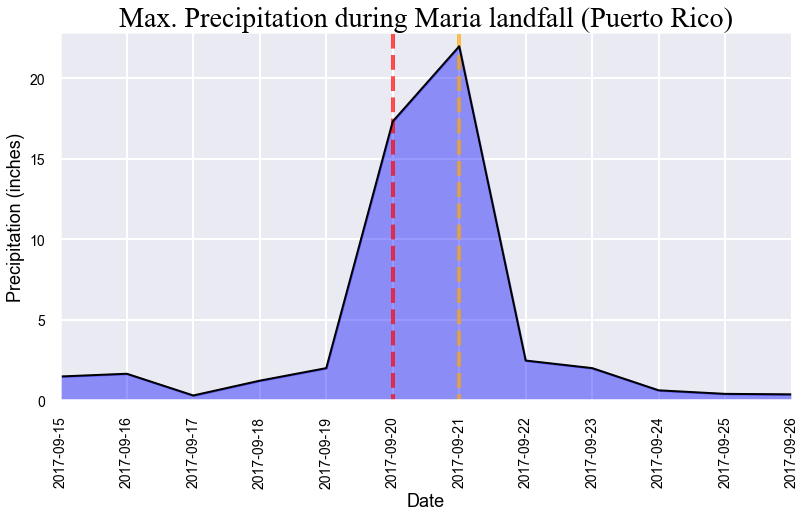

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=1.4,rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(12,8))
# Define x_data & y_data
x_data = df_prcp_max["Date"]
y_data = df_prcp_max["Value"]
# Make a color map
t = np.arange(len(y_data))
# Define x_axis for the plot
x_axis = np.arange(12)
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
# Create the tick labels (unique days)
x_labels = df_prcp["Date"].unique().tolist()
plt.xticks(tick_locations,x_labels,rotation=90,fontsize=14,color="black",**labelfont)
# Set the x limits of the current chart
plt.xlim(0, len(x_axis)-1)
# Set y ticks and y limits of the current chart
plt.yticks(fontsize=14, color = "black", **labelfont)
# Creating padding around the y limits
y_pad = abs(0.2*y_data.mean()) # 20% of mean y value
# Sets the y limits of the current chart
plt.ylim(0,y_data.max()+y_pad )
# Plotting the data
plt.plot(x_data,y_data,color="black",linewidth = 2)
plt.fill_between(x_data,y_data,color = "blue", alpha = 0.4)
# Creating a vertical line denoting the landfall date
plt.vlines("2017-09-20",(y_data.min()-y_pad),(y_data.max()+y_pad),color="red",alpha=0.7,linewidth=4,linestyle="dashed")
plt.vlines("2017-09-21",(y_data.min()-y_pad),(y_data.max()+y_pad),color="orange",alpha=0.7,linewidth=4,linestyle="dashed")
# Display x & y-axis labels and a title for the lineplot
plt.title("Max. Precipitation during Maria landfall (Puerto Rico)",fontsize=28,color="black",**titlefont)
plt.xlabel("Date",fontsize = 18,color="black",**labelfont)
plt.ylabel("Precipitation (inches)",fontsize = 18,color="black",**labelfont)
plt.tight_layout()
# Save the figure
plt.savefig("Output_Data/Maria_Precipitation.png")
# Display the plot
plt.show()

## Let's create merged dataframe with minimum and maximum temperatures

In [18]:
# A copy of the minimum temperature dataframe with relevant colummns
df_min = df_MinTemp[["Date","Value"]]
# Let's groupby value column by date and count the minimum ocurrences
grouped_count = df_min["Value"].groupby(df_min["Date"]) # Create a GroupBy object
# Let's create a dataframe with minimum temperature per day
df_min_unsorted = grouped_count.min().to_frame("MinTemp")
# Let's sort the dataframe by date
df_min = df_min_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_min.reset_index(inplace=True)
# A copy of the maximum temperature dataframe with relevant colummns
df_max = df_MaxTemp[["Date","Value"]]
# Let's groupby value column by date and count the maximum ocurrences
grouped_count = df_max["Value"].groupby(df_max["Date"]) # Create a GroupBy object
# Let's create a dataframe with minimum temperature per day
df_max_unsorted = grouped_count.max().to_frame("MaxTemp")
# Let's sort the dataframe by date
df_max = df_max_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_max.reset_index(inplace=True)
# Combine the dataframes into a single dataframe
df_MinMax = pd.merge(df_max, df_min, how="outer", on="Date")
# Save the dataframe to the output file
df_MinMax.to_csv("Output_Data/Maria_MinMax_Temp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the min-max temperature dataframe is:{}".format(df_MinMax.shape)+'\033[0m')
df_MinMax.head() # Display the dataframe

The shape of the min-max temperature dataframe is:(12, 3)


,Date,MaxTemp,MinTemp
0,2017-09-15,92.0,67.0
1,2017-09-16,91.0,66.0
2,2017-09-17,91.0,68.0
3,2017-09-18,91.0,67.0
4,2017-09-19,92.0,68.0


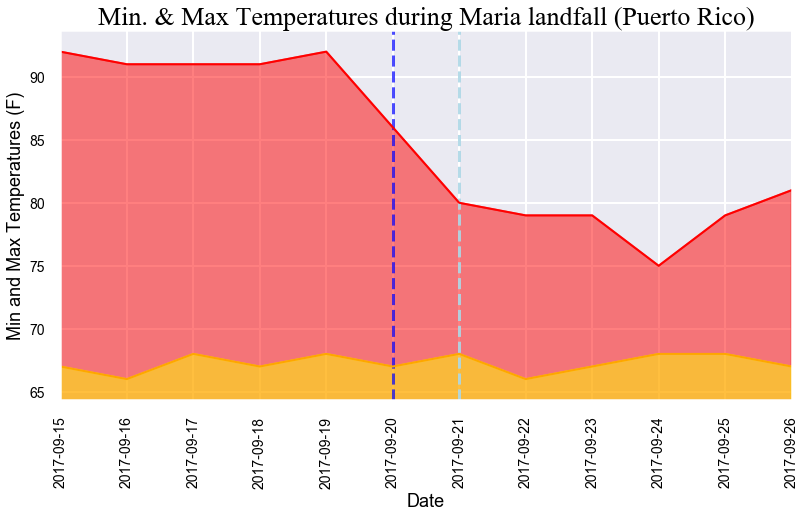

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=1.4,rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(12,8))
# Define x_data & y_data
x_data = df_MinMax["Date"]
y_max = df_MinMax["MaxTemp"]
y_min = df_MinMax["MinTemp"]
# Make a color map
t = np.arange(len(y_data))
# Define x_axis for the plot
x_axis = np.arange(12)
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
# Create the tick labels (unique days)
x_labels = df_prcp["Date"].unique().tolist()
plt.xticks(tick_locations,x_labels,rotation=90,fontsize=14,color="black",**labelfont)
# Set the x limits of the current chart
plt.xlim(0, len(x_axis)-1)
# Creating padding around the x and y limits
y_pad = abs(0.025*y_min.mean()) # 2.5% of mean y value
# Sets the y limits of the current chart
plt.ylim(y_min.min()-y_pad,y_max.max()+y_pad )
# Set y ticks and y limits of the current chart
plt.yticks(fontsize=14, color = "black", **labelfont)
# Plot Maximum Temperature data
plt.plot(x_data,y_max,color="red",linewidth = 2)
# Plot Minimum Temperature data
plt.plot(x_data,y_min,color="orange",linewidth = 2)
# Filling the area below the line plots
plt.fill_between(x_data,y_max,color = "red", alpha = 0.5)
plt.fill_between(x_data,y_min,color = "yellow", alpha = 0.5)
# Creating a vertical line denoting the landfall date
plt.vlines("2017-09-20",(y_min.min()-y_pad),(y_max.max()+y_pad),color="blue",alpha=0.7,linestyle="dashed")
plt.vlines("2017-09-21",(y_min.min()-y_pad),(y_max.max()+y_pad),color="lightblue",alpha=0.9,linestyle="dashed")
# Display x & y-axis labels and a title for the lineplot
plt.title("Min. & Max Temperatures during Maria landfall (Puerto Rico)",fontsize=26,color="black",**titlefont)
plt.xlabel("Date",fontsize = 18,color="black",**labelfont)
plt.ylabel("Min and Max Temperatures (F)",fontsize = 18,color="black",**labelfont)
plt.tight_layout()
# Save the figure
plt.savefig("Output_Data/Maria_MinMaxTemp.png")
# Display the plot
plt.show()